# Dataset Overview: Olist Brazilian E-Commerce Public Dataset

## **Source & Credits**

This analysis is based on the **[Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)**, publicly available on Kaggle. The dataset was generously made available by **Olist**, the largest department store in Brazilian marketplaces.

**License**: CC BY-NC-SA 4.0 (Attribution-NonCommercial-ShareAlike)

---

## **Dataset Summary**

The dataset contains **100,000+ orders** placed on Olist between **2016 and 2018**, across multiple marketplaces in Brazil. It provides a rich, granular view of the entire order lifecycle, from purchase to delivery, including customer reviews, payment methods, geolocation, and product details.

### **Key Data Tables**

| Table | Description |
|-------|-------------|
| **olist_customers_dataset** | Customer IDs, unique customer IDs, and zip code prefixes |
| **olist_geolocation_dataset** | Brazilian zip codes and their lat/lng coordinates |
| **olist_order_items_dataset** | Items within each order, including price, freight value, and seller |
| **olist_order_payments_dataset** | Payment installments, payment type, and payment value |
| **olist_order_reviews_dataset** | Customer reviews (score, comment, creation/response timestamps) |
| **olist_orders_dataset** | Order status, purchase timestamp, delivery dates |
| **olist_products_dataset** | Product IDs, category names, dimensions, and weight |
| **olist_sellers_dataset** | Seller IDs and zip code prefixes |

---

## **Data Characteristics**

- **Time Period**: 2016–2018 (analysis focused on complete months 2017–2018)
- **Geography**: 27 Brazilian states, 4,119 municipalities
- **Marketplace Model**: Connects independent sellers to customers across Brazil
- **Realistic Complexity**: Includes cancelled orders, delayed deliveries, and varied customer behaviors

---

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_csv('archive/olist_customers_dataset.csv')
geolocation = pd.read_csv('archive/olist_geolocation_dataset.csv')
order_items = pd.read_csv('archive/olist_order_items_dataset.csv')
order_payments = pd.read_csv('archive/olist_order_payments_dataset.csv')
orders = pd.read_csv('archive/olist_orders_dataset.csv')
orders_reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv')
products = pd.read_csv('archive/olist_products_dataset.csv')
sellers = pd.read_csv('archive/olist_sellers_dataset.csv')
products_categories_transl = pd.read_csv('archive/product_category_name_translation.csv')

In [23]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders[orders['order_status'] == 'delivered']

# Analysis of Olist's Monthly Revenue (2017-2018)

<Axes: title={'center': 'Monthly Revenue between January 2017 and August 2018'}, xlabel='Year, Month', ylabel='Total Revenue in Dolars'>

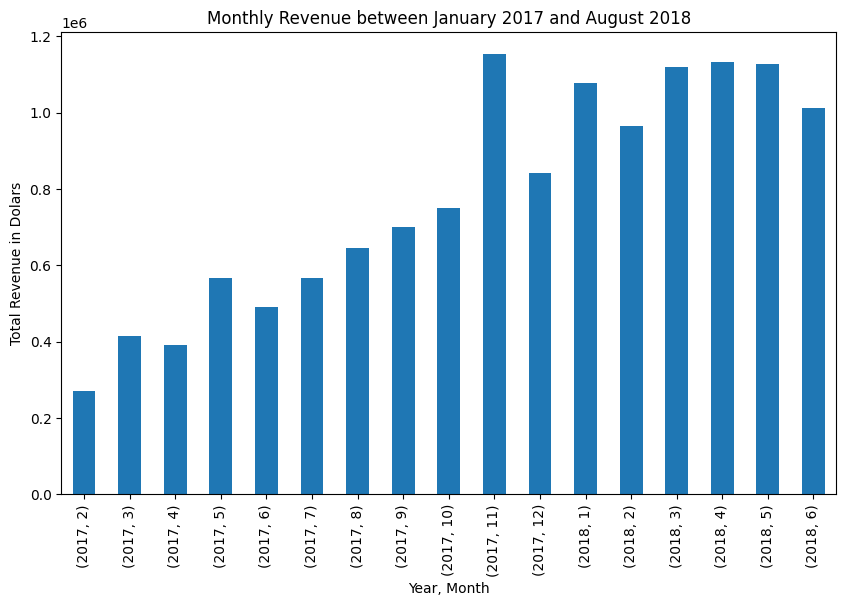

In [24]:

orders_total_pay = order_payments.groupby(by='order_id', as_index=False)['payment_value'].sum()
orders_pay_time = orders.merge(order_payments, on='order_id', how='inner')

orders_pay_time['order_purchase_month'] = orders_pay_time['order_purchase_timestamp'].dt.month
orders_pay_time['order_purchase_day'] = orders_pay_time['order_purchase_timestamp'].dt.day
orders_pay_time['order_purchase_year'] = orders_pay_time['order_purchase_timestamp'].dt.year

plt.figure(figsize=(10,6))
monthly_revenue = orders_pay_time.groupby(by=['order_purchase_year','order_purchase_month'])['payment_value'].sum()
monthly_revenue = monthly_revenue.iloc[3:-2] # Exclude incomplete months
monthly_revenue.plot(title='Monthly Revenue between January 2017 and August 2018', xlabel='Year, Month', ylabel='Total Revenue in Dolars', kind='bar')

Olist's revenue demonstrated exceptional growth over the analyzed 18-month period. Starting from approximately $271k in February 2017, monthly revenue more than quadrupled to peak at $1.13 million by April 2018. Key insights include:

*   The platform saw a steady and significant upward trajectory, with a major inflection point in November 2017 (Black Friday period), after which revenue stabilized at a new, much higher baseline.
*   Clear seasonal spikes are visible in November 2017 (likely Black Friday) and December 2017 (Holidays), followed by a slight dip and then sustained high performance.
*   Revenue post-November 2017 consistently remained above $840k, indicating successful customer acquisition and retention, or marketplace expansion.

## **Methodology Notes**

*   **Data Scope**: Analysis includes only "delivered" orders from February 2017 to June 2018. Incomplete months at the dataset's start and end were excluded.
*   **Revenue Definition**: "Revenue" is operationalized as the total `payment_value` for delivered orders.


## **Strategic Recommendations**

* **Investigate the November 2017 Success**: Conduct a deep-dive analysis into the marketing campaigns, seller promotions, or platform changes that drove the November spike. Replicate and scale these successful strategies for future peak seasons.
* **Capitalize on Sustained Growth**: The new revenue plateau post-November 2017 suggests a successful growth initiative. Allocate resources to maintain this new baseline through customer loyalty programs and seller support.
* **Plan for Seasonality**: Build upon the visible seasonal pattern. Develop targeted marketing and inventory planning strategies in advance to maximize the impact of the Black Friday and Holiday seasons.
* **Monitor Post-Peak Trends**: While growth is strong, note the slight plateau/soft decline from April to June 2018. Investigate whether this is a normal post-peak stabilization or an early indicator of a growth slowdown requiring intervention.

Olist experienced a period of remarkable growth, effectively leveraging seasonal peaks to achieve a permanent step-up in its monthly revenue performance. The focus should now be on sustaining this success and strategically planning for future growth cycles.

# Analysis of Customer Payment Preferences on Olist

<Axes: title={'center': 'Payment Type Ratio per Month'}, xlabel='Year, Month', ylabel='Ratio'>

<Figure size 1000x600 with 0 Axes>

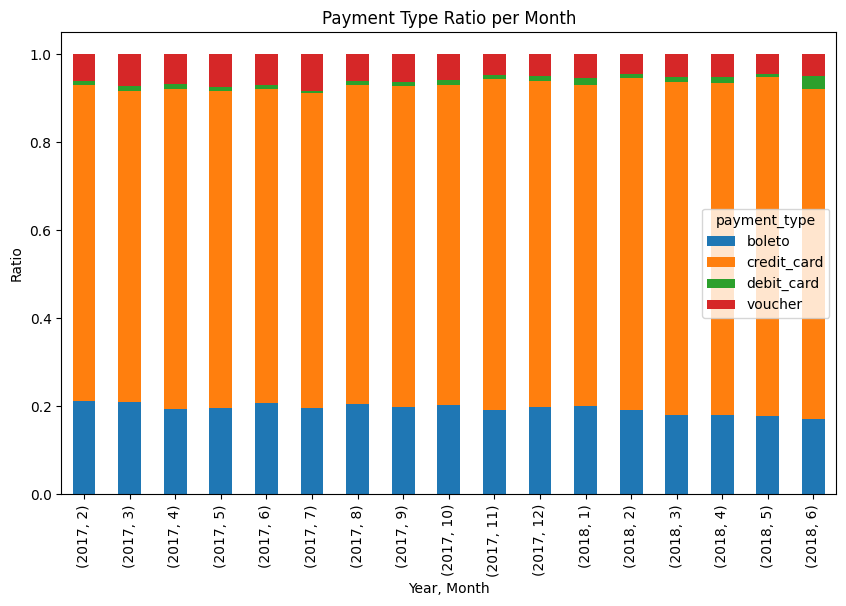

In [25]:
# Ratio payment types per year-month
plt.figure(figsize=(10,6))

payment_type_counts = orders_pay_time.groupby(by=['order_purchase_year','order_purchase_month','payment_type'])['payment_type'].count().unstack()
payment_type_ratio = payment_type_counts.div(payment_type_counts.sum(axis=1), axis=0)
payment_type_ratio = payment_type_ratio.iloc[3:-2] # Exclude incomplete months
payment_type_ratio.plot(kind='bar', stacked=True, title='Payment Type Ratio per Month', xlabel='Year, Month', ylabel='Ratio', figsize=(10,6))

Customer payment behavior on Olist is highly stable and concentrated. **Credit cards dominate** overwhelmingly, consistently accounting for **~71-77%** of all transactions. The key trend is a gradual **migration from *boleto* to credit card** over time, indicating a potential shift in customer trust, convenience, or financial inclusion.

*   Credit Card is the undisputed primary payment method.
*   *Boleto* (bank slip) is the clear second choice (~17-21%), while voucher and debit card usage is minimal (<8% combined).
*   The ratio of credit card payments shows a clear upward trend, rising from ~72% in early 2017 to ~77% by mid-2018, primarily at the expense of *boleto*.

**Strategic Recommendations**

- **Optimize for Credit Card Dominance**: Prioritize partnerships, fraud prevention, and checkout flow optimization for credit card payments. Consider offering benefits (e.g., installments, points) to reinforce this preferred method.
- **Manage the *Boleto* Decline Proactively**: While declining, *boleto* remains significant for a large customer segment (likely unbanked or preferring cash). It's relevant to streamline its process (e.g., faster payment confirmation) to improve conversion rates for these users.
Investigate Low Adoption of Debit & Vouchers
- **Leverage the Trust Signal**: The steady rise in credit card use suggests growing customer confidence in the platform's security. Market this implicitly in communications to reduce purchase anxiety for new customers.

Olist's payment ecosystem is healthy and consolidated around credit cards. The strategy should be to reinforce the leading method, efficiently maintain essential alternatives, and explore targeted growth in underutilized options like debit cards.

## **Olist Customer Segmentation & Value Analysis**

<Axes: title={'center': 'Monetary Value by RFM Customer Segments'}>

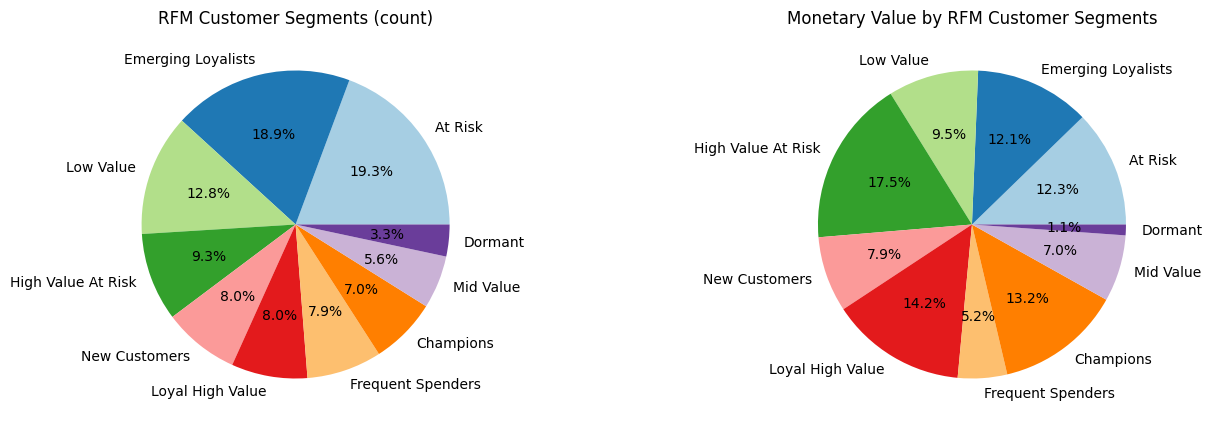

In [26]:
customer_orders = orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='inner')
customer_orders.drop(columns=['customer_id'], inplace=True)
customer_orders.rename(columns={'customer_unique_id':'customer_id'}, inplace=True)

monetary_orders = orders_total_pay.merge(customer_orders[['customer_id', 'order_id']], on='order_id', how='inner') \
    .groupby(by='customer_id', as_index=False)['payment_value'].sum()

monetary_orders.rename(columns={'payment_value':'monetary_value'}, inplace=True)

# Aggregate multiple orders by the same customer on the same day
customer_orders['order_purchase_timestamp'] = customer_orders['order_purchase_timestamp'].dt.normalize() # Normalize to date only
customer_orders = customer_orders.groupby(by=['customer_id', 'order_purchase_timestamp'], as_index=False)['order_id'].first()

recency_orders = customer_orders.groupby(by='customer_id', as_index=False)['order_purchase_timestamp'].max()
recency_orders.rename(columns={'order_purchase_timestamp':'last_purchase_date'}, inplace=True)
recent_date = orders['order_purchase_timestamp'].max()
recency_orders['recency'] = (recent_date - recency_orders['last_purchase_date']).dt.days

frequency_orders = customer_orders.groupby(by='customer_id', as_index=False)['order_id'].count()
frequency_orders.rename(columns={'order_id':'frequency'}, inplace=True)

rfm = recency_orders.merge(monetary_orders, on='customer_id', how='inner').merge(frequency_orders, on='customer_id', how='inner')
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['monetary_score'] = pd.qcut(rfm['monetary_value'], 5, labels=[1,2,3,4,5])

def rfm_segment(row):
    r = row['recency_score']
    f = row['frequency_score']
    m = row['monetary_score']

    # Clients more engaged and with higher value
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    # High value still active
    elif r >= 3 and f >= 3 and m >= 4:
        return 'Loyal High Value'
    # High value customers cooling down
    elif r <= 2 and f >= 3 and m >= 4:
        return 'High Value At Risk'
    # Frequent and good spenders
    elif f >= 4 and m >= 3:
        return 'Frequent Spenders'
    # Clients with potential (returned at least once)
    elif r >= 4 and f >= 2:
        return 'Emerging Loyalists'
    # New clients (still without significant repetition)
    elif r >= 4 and f == 1:
        return 'New Customers'
    # Mid value
    elif r >= 3 and m >= 3:
        return 'Mid Value'
    # Customers with some frequency
    elif r <= 2 and f >= 2:
        return 'At Risk'
    # Low overall engagement
    elif r <= 2 and f == 1 and m <= 2:
        return 'Dormant'
    else:
        return 'Low Value'


    
rfm['RFM_Segment'] = rfm.apply(rfm_segment, axis=1)
segment_counts = rfm['RFM_Segment'].value_counts()

# 2 plots side by side with same color scheme per segment
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
segment_counts.plot(kind='pie',autopct='%1.1f%%', title='RFM Customer Segments (count)', ylabel='', colors=plt.cm.Paired.colors)

plt.subplot(1, 2, 2)
segment_value = rfm.groupby(by='RFM_Segment')['monetary_value'].sum()
segment_value = segment_value.reindex(segment_counts.index)  # Ensure same order as segment_counts
segment_value.plot(kind='pie', autopct='%1.1f%%', title='Monetary Value by RFM Customer Segments', ylabel='', colors=plt.cm.Paired.colors)


Olist's customer base reveals a healthy distribution with significant upside potential. While the largest segment by customer count is "At Risk" (19.3%), the most financially valuable segments are High Value At Risk (17.5% of revenue)** and "Champions" (13.2% of revenue), implying that a substantial portion of high-revenue customers shows signs of disengagement.

*   The distribution is balanced, with healthy proportions in growth segments like "Emerging Loyalists" (18.9%) and "New Customers" (8.0%).
*   Just four segments— High Value At Risk, Champions, Loyal High Value, and At Risk — generate over 57% of total revenue, indicating high value concentration.
*   The "High Value At Risk" segment contributes the most revenue (17.5%) but represents only 9.3% of customers.

**Methodology Notes (RFM Segmentation)**

Customers were segmented using **RFM analysis** (Recency, Frequency, Monetary) based on their purchase history up to the dataset's latest date. Here's what each segment represents:

*   **Champions (7.0% of customers)**: Best customers - recent, frequent, high spenders.
*   **Loyal High Value (8.0%)**: Highly valuable, active, but slightly less recent than Champions.
*   **High Value At Risk (9.3%)**: Historically high spenders who are no longer recent.
*   **Frequent Spenders (7.9%)**: Make frequent purchases of moderate value.
*   **Emerging Loyalists (18.9%)**: Recent return customers showing promising loyalty patterns.
*   **New Customers (8.0%)**: Recent first-time purchasers.
*   **Mid Value (5.6%)**: Moderate spenders who are somewhat recent.
*   **At Risk (19.3%)**: Customers with multiple past purchases who haven't returned recently.
*   **Dormant (3.3%)**: Long-inactive customers with low historical value.
*   **Low Value (12.8%)**: Low-spending, infrequent customers with varying recency.

**Strategic Recommendations**

   *   **Priority #1: Launch a "High Value At Risk" rescue campaign.** Implement personalized win-back offers, dedicated customer service outreach, and surveys to understand their departure.
   *   **Secure the "At Risk" segment (19.3% of customers, 12.3% of revenue):** Deploy automated re-engagement emails and targeted promotions to reactivate this large customer group before they become dormant.
   *   **Nurture "Emerging Loyalists" into "Champions":** Create a loyalty program or offer exclusive benefits to encourage increased frequency and basket size.
   *   **Reward and retain "Champions" and "Loyal High Value":** Implement a VIP program with early access, free shipping, or special discounts to maintain their loyalty and advocacy.
   *   **Reduce friction for "New Customers":** Ensure the credit card checkout process is seamless and secure to convert first-time buyers into repeat customers.
   *   **Consider tailored payment options for high-value segments:** For "Champions" and "Loyal High Value," explore offering premium payment benefits like extended credit or one-click purchasing to enhance their experience.

Olist's growth story is solid, but future success depends on shifting focus from pure acquisition to sophisticated retention. By protecting the valuable "At Risk" customers and systematically nurturing "Emerging Loyalists," Olist can secure its revenue base and accelerate sustainable growth. The payment preference for credit cards should be leveraged to make the repurchase process as easy as possible for these key segments.

# Olist Repeat Purchase Behavior Analysis

<Axes: title={'center': 'Distribution of Days Between Purchases for Repeat Customers'}, xlabel='Days Between Purchases', ylabel='Number of Purchases'>

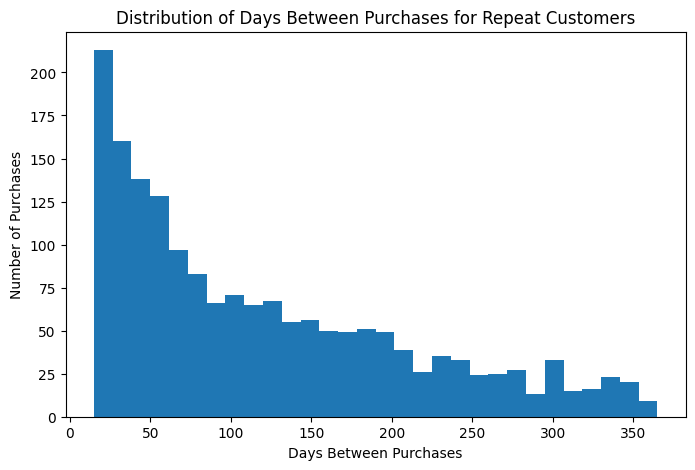

In [27]:
repeat_customers = customer_orders[customer_orders['customer_id'].duplicated(keep=False)][['customer_id', 'order_purchase_timestamp']].copy()
repeat_customers.sort_values(by=['customer_id', 'order_purchase_timestamp'], inplace=True)
customer_purchase_days = repeat_customers.groupby(by='customer_id')['order_purchase_timestamp'].diff().dt.days
customer_purchase_days = customer_purchase_days.dropna()
customer_purchase_days[(customer_purchase_days < 366) & (customer_purchase_days > 14)].plot(kind='hist', bins=30, title='Distribution of Days Between Purchases for Repeat Customers', xlabel='Days Between Purchases', ylabel='Number of Purchases', figsize=(8,5))


Repeat customers on Olist demonstrate a strong preference for repurchasing within a short window. The vast majority of repeat purchases occur within the first 30 days, with a steep drop-off thereafter. This indicates that customer loyalty is established—or lost—quickly.
- Repurchase probability after 90 days is very low (221 purchases vs. 550 in the 14–30 day window).
- 550 repeat purchases occur between 14–30 days, representing the single largest concentration.
- Repeat frequency drops sharply after 30 days and continues to decline steadily, with very few customers returning after 180 days.
- If a customer does not repurchase within the first month, the probability of them becoming a repeat buyer drops significantly.
- The steep drop-off after 30 days directly explains why "At Risk" (19.3%) and "High Value At Risk" (9.3%) are Olist's largest and most valuable problem segments. Flag customers who do not repurchase within 45 days and trigger a re-engagement sequence.

**Methodology Notes**

- Analysis includes only customers with at least two delivered orders.
- The difference in days between a customer's first and second purchase (and subsequent purchases) was calculated. Only intervals between 14 and 365 days were included to exclude likely returns/cancellations (<14 days) and capture meaningful repurchase cycles.

**Strategic Recommendations**

**1. Activate New Customers Within 30 Days - The Golden Window:**
   - Implement a "30-Day Repurchase Campaign" for all first-time buyers. Send personalized recommendations, limited-time discounts, or free shipping offers timed for 2–3 weeks after delivery.
   - Aligns target segment with "New Customers" (8.0%) and "Emerging Loyalists" (18.9%). Converting these segments within 30 days accelerates them toward becoming "Champions".
   - For customers at 60–75 days since last purchase, deploy aggressive win-back offers. After 90 days, acquisition cost to re-activate is likely higher than acquiring a new customer.
   - Maintain engagement with exclusive early access or VIP perks every 20–30 days to reinforce the habit loop for "Champions" and "Loyal High Value".
   - Analyze repurchase cycle—if the "frequent spenders" cluster at 30–60 days, align marketing communications to precede their expected next purchase.

The first 30 days post-purchase are the most critical inflection point in the customer lifecycle. Olist must shift from a passive acquisition model to an active, time-sensitive retention engine focused on converting first-time buyers into repeat customers within this narrow window. This intervention would directly shrink the "At Risk" segments and accelerate growth in "Champions" and "Loyal High Value" segments.

In [28]:
orders_region_product = orders[['order_id','customer_id']] \
        .merge(order_items[['order_id','product_id','price']], on='order_id') \
        .merge(products[['product_id','product_category_name']], on='product_id') \
        .merge(customers[['customer_id','customer_state']], on='customer_id') \
        .merge(products_categories_transl, on='product_category_name', how='left') \
        .drop(columns=['product_category_name']) \
        .rename(columns={'product_category_name_english':'product_category_name'})


# Olist Regional Market Analysis: Volume, Revenue, and Specialization

**1. Market Concentration by State (Transaction Volume)**
 
São Paulo (**SP**) is the undisputed core of Olist's operations, accounting for **46,448 product purchases**—more than three times the volume of the next largest state, Rio de Janeiro (**RJ**, 14,143). Together, the Southeast states (SP, RJ, MG) represent **~70% of total transaction volume**. This extreme concentration suggests that Olist's growth and brand awareness are heavily anchored in Brazil's economic heartland.

In [29]:
numbers_purchace = orders_region_product.groupby('customer_state')['order_id'].count().reset_index(name='num_products')
numbers_purchace.sort_values(by='num_products', ascending=False, inplace=True)
numbers_purchace.reset_index(drop=True, inplace=True)
numbers_purchace

,customer_state,num_products
0,SP,46448
1,RJ,14143
2,MG,12916
3,RS,6134
4,PR,5649
5,SC,4097
6,BA,3683
7,DF,2355
8,GO,2277
9,ES,2225


**2. Top-Selling Categories by State (Revenue)**

Despite SP's dominance in volume, its top revenue category is bed\_bath\_table, generating $472k. However, several states show distinct preferences:
- RJ and DF favor watches\_gifts.
- MG, BA, PE, CE, PA and many others lead with health\_beauty.
- PR, SC, and AC show strength in sports\_leisure.
This indicates that while SP sets the overall scale, regional taste profiles exist and drive meaningful revenue in secondary states.

In [30]:
sales_region = orders_region_product.groupby(
    ['customer_state','product_category_name']
).agg({'price':'sum',
       'order_id':'count'}).reset_index().rename(columns={'price':'revenue', 'order_id':'num_products'})


top_products = sales_region.sort_values(
    ['customer_state','revenue','num_products'],
    ascending=[True, False, False]
).drop_duplicates('customer_state').sort_values(by='revenue', ascending=False).reset_index(drop=True)

top_products


,customer_state,product_category_name,revenue,num_products
0,SP,bed_bath_table,472238.07,5157
1,RJ,watches_gifts,174895.01,846
2,MG,health_beauty,154324.15,1064
3,RS,bed_bath_table,60040.95,611
4,PR,sports_leisure,57653.30,476
5,BA,health_beauty,49955.12,340
6,SC,sports_leisure,41579.03,356
7,PE,health_beauty,40685.01,233
8,DF,watches_gifts,32292.27,146
9,CE,health_beauty,31544.50,162


3. **Regional Specialization (Location Quotient Analysis)**

Applying a **Bayesian‑adjusted Location Quotient** (LQ ≥ 1.25) reveals pockets of genuine specialization that go beyond mere volume:
- Pará (PA) is 6× more concentrated in "health\_beauty" than the national average (Highly Specialized).
- Pernambuco (PE) shows strong specialization in health\_beauty, watches\_gifts, and telephony.
- Ceará (CE) is Highly Specialized in watches\_gifts and health\_beauty.
- States like BA, DF, ES, GO, and SC exhibit moderate specialization across several categories (e.g., telephony, auto, garden tools).
These specializations often occur in states that are not the top revenue contributors, highlighting underleveraged competitive advantages in regional markets.

In [31]:
min_num_products = 100 # Set a threshold for minimum number of products sold to consider LQ calculation
sales_region_filtered = sales_region[sales_region['num_products'] >= min_num_products]

general_lq = orders_region_product.groupby(by='product_category_name')['price'].sum() / \
             orders_region_product['price'].sum()

regional_lq = sales_region_filtered.groupby(by=['customer_state','product_category_name'])['revenue'].sum().unstack() \
            .div(sales_region_filtered.groupby(by='customer_state')['revenue'].sum(), axis='index')
regional_lq.fillna(0, inplace=True)

lq = regional_lq.div(general_lq, axis='columns')
lq = lq.stack().reset_index(name='LQ').sort_values(by='LQ', ascending=False).reset_index(drop=True)

# baysean adjustment
average_revenue = orders_region_product.groupby(by='product_category_name')['price'].mean()
overall_average_revenue = orders_region_product['price'].mean()
lq = lq.merge(average_revenue.rename('average_revenue'), on='product_category_name', how='left')

#ajusted_lq = (LQ * average_revenue + overall_average_revenue) / (average_revenue + overall_average_revenue)
lq['adjusted_LQ'] = (lq['LQ'] * lq['average_revenue'] + overall_average_revenue) / (lq['average_revenue'] + overall_average_revenue)
lq.drop(columns=['LQ','average_revenue'], inplace=True)
lq.reset_index(drop=True, inplace=True)
lq = lq[lq['adjusted_LQ'] >= 1.25]

def classify_lq(lq):
    if lq >= 2:
        return 'Highly Specialized'
    elif lq >= 1.25:
        return 'Moderate Specialization'
    
lq['Specialization'] = lq['adjusted_LQ'].apply(classify_lq)
lq.sort_values(by=['customer_state','adjusted_LQ'], ascending=[True, False], inplace=True)
lq.reset_index(drop=True, inplace=True)
lq
    


,customer_state,product_category_name,adjusted_LQ,Specialization
0,BA,telephony,1.553261,Moderate Specialization
1,BA,auto,1.502540,Moderate Specialization
2,BA,garden_tools,1.459462,Moderate Specialization
3,BA,watches_gifts,1.314905,Moderate Specialization
4,BA,health_beauty,1.290413,Moderate Specialization
5,CE,watches_gifts,3.765773,Highly Specialized
6,CE,health_beauty,3.386309,Highly Specialized
7,DF,watches_gifts,1.748605,Moderate Specialization
8,DF,auto,1.736387,Moderate Specialization
9,DF,computers_accessories,1.557236,Moderate Specialization


The volume leaders (SP, RJ, MG) do not necessarily exhibit high LQ values—they sell a broad mix close to the national average. In contrast, mid‑sized states (PA, PE, CE) punch above their weight in specific niches. This suggests that Olist’s current revenue is driven by scale in large states, but future growth can be unlocked by nurturing regional specialization in emerging markets.

**Methodology Notes**

- **Transaction Volume**: Count of products sold per state (orders × items).
- **Top Categories per State**: Highest revenue‑generating category by state; identifies local preferences.
- **Location Quotient (LQ)**: Measures the concentration of a product category in a state relative to its national share.  
  `LQ = (state category revenue / state total revenue) / (national category revenue / national total revenue)`
- **Bayesian Adjustment**: To avoid overinterpreting small samples, LQ was adjusted using the national average revenue as a prior. Only categories with ≥100 transactions in the state were considered, and final results were filtered to adjusted LQ ≥ 1.25.
- **Specialization Levels**:  
  - Moderate Specialization: 1.25 ≤ LQ < 2.0  
  - Highly Specialized: LQ ≥ 2.0


**Strategic Recommendations (Integrating All Three Analyses)**

-  Maintain aggressive marketing and seller acquisition in SP, RJ, and MG—they are the revenue backbone. However, allocate dedicated regional growth budgets to states with clear specialization (PA, PE, CE, BA, etc.).
- Partner with local sellers in highly specialized categories (e.g., health & beauty in PA/PE, watches & gifts in CE). Promote them as regional “category champions” on the platform. Use geo‑targeted push notifications and email campaigns highlighting locally relevant products.
- Analyze why health\_beauty thrives in the Northeast (BA, PE, CE, PA) and sports\_leisure in the South (PR, SC). Apply those merchandising, pricing, or logistics strategies to underperforming states with similar demographics.
- States like AM, AP, AC, RR have very low volumes but show nascent specialization (e.g., computers accessories in AP, sports leisure in AC/RR). Pilot small‑scale logistics partnerships or seller onboarding in these states to test scalability.


Olist’s regional landscape is a story of concentrated power and hidden gems. By defending the Southeast strongholds while systematically investing in the specialized niches of emerging states, Olist can achieve more balanced, resilient growth and deepen its national footprint.